In [3]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, statsmodels.api as sm, seaborn as sns

In [4]:
from sklearn.linear_model import LinearRegression

In [6]:
df = pd.read_csv("Salary_Data.csv")

## Exploratory Data Analysis

In [44]:
df.head()

,exp,sal
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [45]:
x = df['exp']
y = df['sal']

In [14]:
df= df.rename(columns={'YearsExperience': 'exp', 'Salary': 'sal'})

In [15]:
df.shape

(30, 2)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   exp     30 non-null     float64
 1   sal     30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [17]:
df.isnull().sum()

exp    0
sal    0
dtype: int64

In [20]:
df.describe()

,exp,sal
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


### Visualizations

#### Boxplot

<AxesSubplot:>

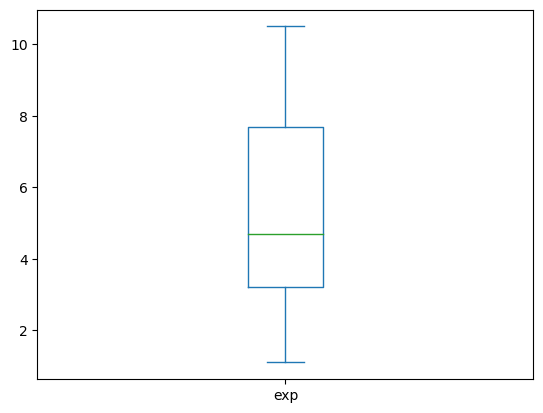

In [29]:
df["exp"].plot(kind="box")


<AxesSubplot:>

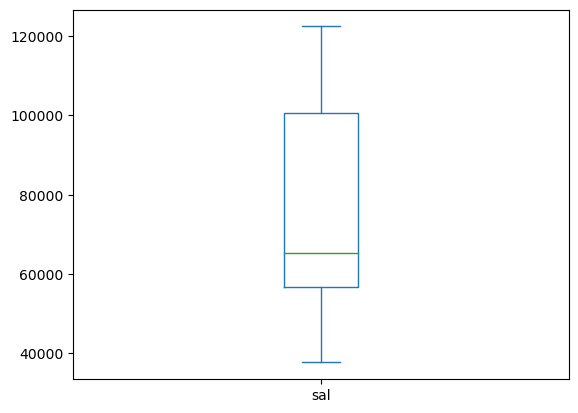

In [30]:
df['sal'].plot(kind='box')

In [33]:
#finding outliers

q1 = np.percentile(df['exp'], 25)
q3 = np.percentile(df['exp'], 75)
iqr = q3 - q1

# Define the threshold for outliers (typically 1.5 times the IQR)
threshold = 1.5 * iqr

# Find outliers
outliers = [x for x in df["exp"] if (x < q1 - threshold) or (x > q3 + threshold)]

print("Outliers:", outliers)

Outliers: []


In [34]:
q1 = np.percentile(df['sal'], 25)
q3 = np.percentile(df['sal'], 75)
iqr = q3 - q1

# Define the threshold for outliers (typically 1.5 times the IQR)
threshold = 1.5 * iqr

# Find outliers
outliers = [x for x in df["sal"] if (x < q1 - threshold) or (x > q3 + threshold)]

print("Outliers:", outliers)

Outliers: []


#### so there are no affecting outliers in our dataset

<AxesSubplot:>

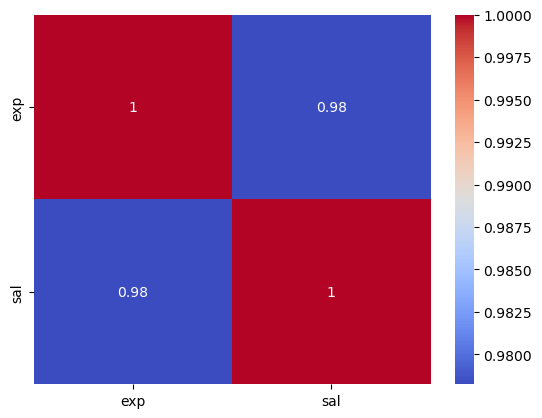

In [38]:
cm = df.corr()
sns.heatmap(cm, annot=True , cmap="coolwarm")

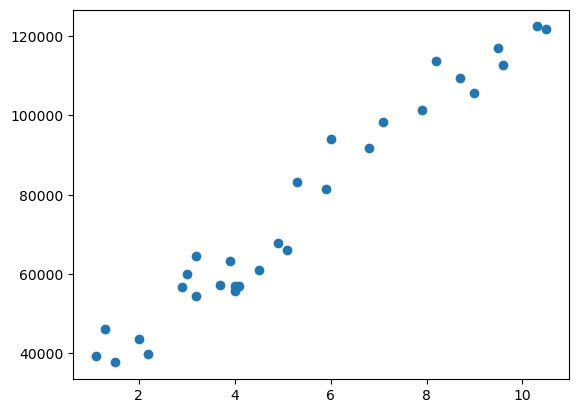

In [41]:
plt.scatter("exp","sal", data=df)
plt.xlabel = 

In [42]:
df.corr()

,exp,sal
exp,1.000000,0.978242
sal,0.978242,1.000000


In [47]:
corr = np.corrcoef(x,y)
corr

array([[1.        , 0.97824162],
       [0.97824162, 1.        ]])

#### the corelation between these two columns is HIGH

## Regression Model

### 1. No transformation

In [54]:
model = sm.OLS(y, x).fit()
pred = model.predict(x)

In [55]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    sal   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.972
Method:                 Least Squares   F-statistic:                              1048.
Date:                Tue, 19 Sep 2023   Prob (F-statistic):                    2.56e-24
Time:                        17:07:14   Log-Likelihood:                         -327.28
No. Observations:                  30   AIC:                                      656.6
Df Residuals:                      29   BIC:                                      658.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
exp         1.325e+04    409.401     32.376      0.000    1.24e+04    1.41e+04
==============================================================================
Omnibus:                        0.610   Durbin-Watson:                   0.323
Prob(Omnibus):                  0.737   Jarque-Bera (JB):                0.671
Skew:                          -0.121   Prob(JB):                        0.715
Kurtosis:                       2.308   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 2. Log Transformation to X

In [60]:
x_log = np.log(df['exp'])

In [61]:
m2 = sm.OLS(y, x_log).fit()
pred2 = m2.predict(x_log)

In [62]:
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    sal   R-squared (uncentered):                   0.979
Model:                            OLS   Adj. R-squared (uncentered):              0.978
Method:                 Least Squares   F-statistic:                              1338.
Date:                Tue, 19 Sep 2023   Prob (F-statistic):                    8.06e-26
Time:                        17:10:35   Log-Likelihood:                         -323.70
No. Observations:                  30   AIC:                                      649.4
Df Residuals:                      29   BIC:                                      650.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
exp         4.909e+04   1341.796     36.583      0.000    4.63e+04    5.18e+04
==============================================================================
Omnibus:                       10.249   Durbin-Watson:                   0.421
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                8.950
Skew:                           1.106   Prob(JB):                       0.0114
Kurtosis:                       4.507   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 3. Log Transformation to Y

In [63]:
y_log = np.log(df['sal'])

In [65]:
m3 = sm.OLS(y_log, x).fit()
pred3 = m3.predict(x)

In [66]:
m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    sal   R-squared (uncentered):                   0.809
Model:                            OLS   Adj. R-squared (uncentered):              0.802
Method:                 Least Squares   F-statistic:                              122.8
Date:                Tue, 19 Sep 2023   Prob (F-statistic):                    6.09e-12
Time:                        17:17:52   Log-Likelihood:                         -90.160
No. Observations:                  30   AIC:                                      182.3
Df Residuals:                      29   BIC:                                      183.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
exp            1.6755      0.151     11.083      0.000       1.366       1.985
==============================================================================
Omnibus:                        3.609   Durbin-Watson:                   0.016
Prob(Omnibus):                  0.165   Jarque-Bera (JB):                2.045
Skew:                          -0.389   Prob(JB):                        0.360
Kurtosis:                       1.985   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 4. Log Transformation to X and Y

In [76]:
m4 = sm.OLS(y_log , x_log).fit()
pred4 = m4.predict(x_log)

In [77]:
m4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    sal   R-squared (uncentered):                   0.878
Model:                            OLS   Adj. R-squared (uncentered):              0.874
Method:                 Least Squares   F-statistic:                              209.1
Date:                Tue, 19 Sep 2023   Prob (F-statistic):                    8.60e-15
Time:                        17:29:34   Log-Likelihood:                         -83.410
No. Observations:                  30   AIC:                                      168.8
Df Residuals:                      29   BIC:                                      170.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
exp            6.4461      0.446     14.461      0.000       5.534       7.358
==============================================================================
Omnibus:                        2.550   Durbin-Watson:                   0.026
Prob(Omnibus):                  0.279   Jarque-Bera (JB):                2.163
Skew:                           0.640   Prob(JB):                        0.339
Kurtosis:                       2.697   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 5. Sq Root Transformation to X

In [71]:
x_sq = np.sqrt(df['exp'])

In [72]:
m5 = sm.OLS(x_sq, y).fit()
pred5 = m5.predict(x_sq)

In [73]:
m5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    exp   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.989
Method:                 Least Squares   F-statistic:                              2697.
Date:                Tue, 19 Sep 2023   Prob (F-statistic):                    3.62e-30
Time:                        17:26:42   Log-Likelihood:                         0.52783
No. Observations:                  30   AIC:                                     0.9443
Df Residuals:                      29   BIC:                                      2.346
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
sal         2.843e-05   5.47e-07     51.932      0.000    2.73e-05    2.96e-05
==============================================================================
Omnibus:                        5.574   Durbin-Watson:                   0.727
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                1.846
Skew:                           0.062   Prob(JB):                        0.397
Kurtosis:                       1.791   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 6. Sq Root Transformation to Y

In [78]:
y_sq = np.sqrt(df['sal'])

In [80]:
m6 = sm.OLS(x, y_sq).fit()
pred6 = m6.predict(x)

In [81]:
m6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    exp   R-squared (uncentered):                   0.906
Model:                            OLS   Adj. R-squared (uncentered):              0.902
Method:                 Least Squares   F-statistic:                              278.1
Date:                Tue, 19 Sep 2023   Prob (F-statistic):                    2.12e-16
Time:                        17:31:16   Log-Likelihood:                         -60.931
No. Observations:                  30   AIC:                                      123.9
Df Residuals:                      29   BIC:                                      125.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
sal            0.0207      0.001     16.676      0.000       0.018       0.023
==============================================================================
Omnibus:                        2.574   Durbin-Watson:                   0.048
Prob(Omnibus):                  0.276   Jarque-Bera (JB):                1.884
Skew:                           0.436   Prob(JB):                        0.390
Kurtosis:                       2.136   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 7. Sq Root Transformation to X and Y

In [82]:
m7 = sm.OLS(y_sq, x_sq).fit()
pred7 = m7.predict(x_sq)

In [83]:
m7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    sal   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              2338.
Date:                Tue, 19 Sep 2023   Prob (F-statistic):                    2.81e-29
Time:                        17:32:37   Log-Likelihood:                         -145.12
No. Observations:                  30   AIC:                                      292.2
Df Residuals:                      29   BIC:                                      293.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
exp          118.8652      2.458     48.352      0.000     113.837     123.893
==============================================================================
Omnibus:                        2.762   Durbin-Watson:                   0.231
Prob(Omnibus):                  0.251   Jarque-Bera (JB):                2.152
Skew:                           0.653   Prob(JB):                        0.341
Kurtosis:                       2.881   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The best model to select here is "m5" model 5

p<0.01

with r2  = 0.989

Thus the model explains 98.9% of the variance in dependent variable